In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  

In [20]:
df = pd.read_csv("L:/usuários/leandro/OneDrive/Área de Trabalho/cronograma30/cronograma-analise-dados/dia4-manipulacao-de-dados/data/dirty_cafe_sales.csv")

In [21]:
df = df.replace(['UNKNOWN', 'ERROR', 'None', 'e.g.'], pd.NA)  
df = df.dropna()

In [36]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

In [37]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [38]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df = df.dropna(subset=['Transaction Date'])


In [39]:
df.info

<bound method DataFrame.info of      Transaction ID      Item  Quantity Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee         2            2.0          4.0   
1       TXN_4977031      Cake         4            3.0         12.0   
4       TXN_3160411    Coffee         2            2.0          4.0   
10      TXN_2548360     Salad         5            5.0         25.0   
12      TXN_7619095  Sandwich         2            4.0          8.0   
...             ...       ...       ...            ...          ...   
9975    TXN_9668108      Cake         1            3.0          3.0   
9979    TXN_9933628  Smoothie         5            4.0         20.0   
9986    TXN_2858441  Sandwich         2            4.0          8.0   
9991    TXN_3897619  Sandwich         3            4.0         12.0   
9999    TXN_6170729  Sandwich         3            4.0         12.0   

      Payment Method  Location Transaction Date Calculated Total  
0        Credit Card  Takeaway       2023-09-08 

In [40]:
df.head

<bound method NDFrame.head of      Transaction ID      Item  Quantity Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee         2            2.0          4.0   
1       TXN_4977031      Cake         4            3.0         12.0   
4       TXN_3160411    Coffee         2            2.0          4.0   
10      TXN_2548360     Salad         5            5.0         25.0   
12      TXN_7619095  Sandwich         2            4.0          8.0   
...             ...       ...       ...            ...          ...   
9975    TXN_9668108      Cake         1            3.0          3.0   
9979    TXN_9933628  Smoothie         5            4.0         20.0   
9986    TXN_2858441  Sandwich         2            4.0          8.0   
9991    TXN_3897619  Sandwich         3            4.0         12.0   
9999    TXN_6170729  Sandwich         3            4.0         12.0   

      Payment Method  Location Transaction Date Calculated Total  
0        Credit Card  Takeaway       2023-09-08   

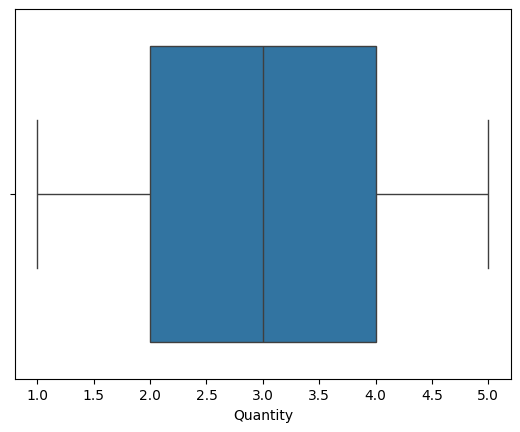

In [41]:
sns.boxplot(x=df['Quantity'])  
plt.show()

Essa plotagem foi feita para ver se há outliers na questão do preço dos produtos, o que não tem!

In [42]:
df['Payment Method'].value_counts()


Payment Method
Digital Wallet    1069
Cash              1018
Credit Card       1002
Name: count, dtype: int64

In [43]:
df['Location'].value_counts()


Location
Takeaway    1547
In-store    1542
Name: count, dtype: int64

In [44]:
df['Total Spent'].mean()


np.float64(8.936710909679508)

In [45]:
df['Weekday'] = df['Transaction Date'].dt.day_name()
df['Weekday'].value_counts()


Weekday
Monday       472
Thursday     455
Sunday       452
Friday       446
Tuesday      427
Saturday     425
Wednesday    412
Name: count, dtype: int64

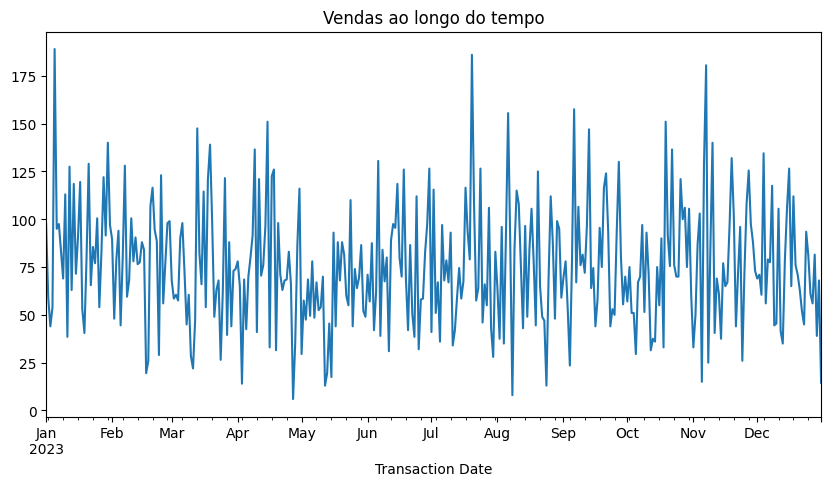

In [46]:
import matplotlib.pyplot as plt  

df.groupby('Transaction Date')['Total Spent'].sum().plot(figsize=(10, 5), title="Vendas ao longo do tempo")
plt.show()


In [47]:
df.groupby('Payment Method')['Total Spent'].mean()


Payment Method
Cash              8.920923
Credit Card       8.833333
Digital Wallet    9.048644
Name: Total Spent, dtype: float64

In [48]:
df.groupby(['Location', 'Item'])['Quantity'].sum().unstack().fillna(0)


Item,Cake,Coffee,Cookie,Juice,Salad,Sandwich,Smoothie,Tea
Location,,,,,,,,
In-store,572,500,525,668,682,641,505,581
Takeaway,601,621,638,577,590,552,517,570


📌 Conclusões Principais
1 Método de Pagamento: Digital Wallet é o mais utilizado
O Digital Wallet lidera com 1069 transações, seguido por Cash (1018) e Credit Card (1002).
Isso pode indicar que os clientes do café preferem métodos digitais, possivelmente por praticidade.
Se o ticket médio de cartão de crédito for maior, pode ser interessante promover incentivos para esse método, como descontos ou programas de fidelidade.
2 Localização das Vendas: Takeaway e In-store são equilibrados
As vendas estão quase equilibradas entre Takeaway (1547 transações) e In-store (1542 transações).
A distribuição de produtos é semelhante entre as duas categorias, mas há algumas diferenças:
Takeaway vende mais Café e Cookies, possivelmente por serem produtos práticos para levar.
In-store tem mais pedidos de Juice e Salad, que podem ser consumidos com mais calma no local.
O café pode explorar isso criando promoções para combos "To Go" ou incentivos para pedidos no local.
4 Picos e Quedas nas Vendas por Dia da Semana
Segunda-feira tem mais vendas (472 transações), enquanto quarta-feira tem menos (412 transações).
Isso sugere que as pessoas começam a semana indo mais ao café, mas pode haver uma queda no meio da semana.
Uma possível ação seria criar promoções para atrair clientes às quartas-feiras, como descontos ou combos especiais.
4 Vendas por Item: Bolos e Cookies dominam, mas Café também é forte
Os itens mais vendidos em In-store: Saladas (682), Sucos (668) e Sanduíches (641).
Os itens mais vendidos em Takeaway: Cookies (638), Café (621) e Bolos (601).
Produtos rápidos e práticos, como Café, Cookies e Smoothies, são mais populares para levar.
Sugestão: O café poderia criar um combo de Takeaway, como "Café + Cookie com desconto", para incentivar ainda mais essas vendas.

Ideias de Estratégias Baseadas nos Dados
✔️ Criar promoções específicas para quartas-feiras, o dia com menos vendas.
✔️ Lançar um combo de Café + Cookie para Takeaway, pois são os itens mais populares para viagem.
✔️ Explorar um programa de fidelidade para incentivar mais pagamentos via cartão de crédito, caso o ticket médio seja maior.
✔️ Criar um cardápio personalizado para In-store e Takeaway, destacando os produtos mais consumidos em cada modalidade.